# State package testing

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import State

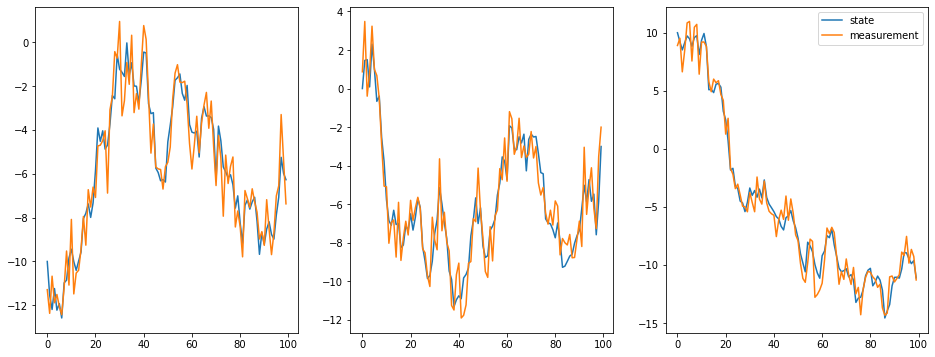

In [2]:
'''
Testing the BaseState class.
'''
init = np.array([-10,0,10])

s = State.BaseState(init,True)
m = s.make_measurement().reshape((-1,1))
times = list(range(100))


for t in times[:-1]:
    #print(t)
    s.evolve()
    m = np.hstack((m, s.make_measurement().reshape((-1,1))))

fig, axs = plt.subplots(1,3,figsize=(16,6))
for i, ax in enumerate(axs):
    ax.plot(times,s.trajectory.T[:,i],label='state')
    ax.plot(times,m[:30][i],label='measurement')

ax.legend()

plt.show()



[0 0 0 0]


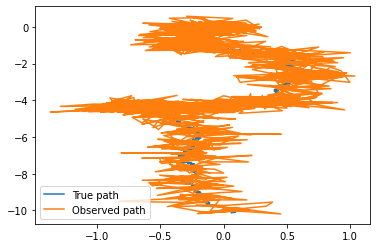

In [3]:
'''Testing the Velocity_nD class'''

initP = np.array([0,0])
initV = np.array([0,0])

s = State.Velocity_nD(initP,initV,True)
m = s.make_measurement().reshape((-1,1))

for t in range(10000):
    s.evolve(dt=0.005)
    if t%10 == 0:
        m = np.hstack((m, s.make_measurement().reshape((-1,1))))

ax = plt.subplot()

ax.plot(s.trajectory[0,:],s.trajectory[1,:],label='True path')
ax.plot(m[0,:],m[1,:],label='Observed path')

ax.legend()

plt.show()